In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd 
import seaborn as sns


In [2]:
font = {'size'   : 14}
plt.rc('font', **font)
plt.style.use('seaborn-dark-palette')

In [3]:
single_params_lim = ['hard_hm_hilim' ,'hard_hm_lolim' ,'hard_hs_hilim' ,'hard_hs_lolim' ,'hard_ms_hilim' ,'hard_ms_lolim', 'flux_powlaw_hilim' ,'flux_powlaw_lolim', 'powlaw_gamma_hilim' , 'powlaw_gamma_lolim' ,'powlaw_nh_hilim' , 'powlaw_nh_lolim' ,'powlaw_ampl_hilim' , 'powlaw_ampl_lolim' , 'bb_ampl_lolim' ,'bb_ampl_hilim' ,  'flux_brems_lolim' , 'flux_brems_hilim' , 'brems_kt_hilim' ,'brems_kt_lolim' ,'brems_nh_hilim' ,'brems_nh_lolim' , 'bb_kt_hilim' , 'bb_kt_lolim' ,'bb_nh_hilim' , 'bb_nh_lolim' ,  ]


In [4]:
print(single_params_lim)

['hard_hm_hilim', 'hard_hm_lolim', 'hard_hs_hilim', 'hard_hs_lolim', 'hard_ms_hilim', 'hard_ms_lolim', 'flux_powlaw_hilim', 'flux_powlaw_lolim', 'powlaw_gamma_hilim', 'powlaw_gamma_lolim', 'powlaw_nh_hilim', 'powlaw_nh_lolim', 'powlaw_ampl_hilim', 'powlaw_ampl_lolim', 'bb_ampl_lolim', 'bb_ampl_hilim', 'flux_brems_lolim', 'flux_brems_hilim', 'brems_kt_hilim', 'brems_kt_lolim', 'brems_nh_hilim', 'brems_nh_lolim', 'bb_kt_hilim', 'bb_kt_lolim', 'bb_nh_hilim', 'bb_nh_lolim']


In [5]:
data = pd.read_csv('pred_result/NS_BH_train.csv')
display(data)
#data = data.drop(single_params_lim , axis=1)
#display(data)

,Unnamed: 0,obs_id,index,is_ok,class,pred_class,prob,src_id,src_name,livetime,...,flux_brems_lolim,flux_brems_hilim,brems_kt_hilim,brems_kt_lolim,brems_nh_hilim,brems_nh_lolim,bb_kt_hilim,bb_kt_lolim,bb_nh_hilim,bb_nh_lolim
0,2,2,2,1,BH,BH,0.990246,BH0001,1A 0620-00,29673.9,...,13.083178,13.013990,4.3130,2.7990,17.89,8.830,0.6263,0.5576,0.8602,0.000
1,0,0,0,0,BH,NS,0.797091,BH0001,1A 0620-00,41932.7,...,0.000000,0.000000,0.0000,0.0000,0.00,0.000,0.0000,0.0000,0.0000,0.000
2,1,1,1,1,BH,BH,0.970959,BH0001,1A 0620-00,39623.0,...,13.433798,13.353400,3.1340,2.0000,15.48,6.992,0.5002,0.4332,1.0350,0.000
3,10,10,0,1,BH,BH,0.970523,BH0004,GRO J1655-40,42550.7,...,0.000000,0.000000,0.0000,0.0000,0.00,0.000,0.0000,0.0000,0.0000,0.000
4,11,11,1,1,BH,BH,0.972695,BH0004,GRO J1655-40,18207.1,...,13.196065,13.052468,3.5500,1.9820,168.60,113.200,0.8334,0.6885,89.6000,46.560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,435,631,14,1,NS,NS,1.000000,NS0078,1WGA J1911.2+0035,7127.2,...,12.565910,12.474437,0.7382,0.5778,57.98,47.660,0.3158,0.2750,38.0100,27.170
366,422,618,1,1,NS,NS,0.999752,NS0078,1WGA J1911.2+0035,9873.4,...,12.177963,12.135845,1.7890,1.4190,35.84,27.420,0.4899,0.4420,11.1200,2.627
367,441,637,0,1,NS,NS,0.999999,NS0083,E2259+587,24783.0,...,11.891435,11.875170,1.5250,1.4110,88.92,83.260,0.5262,0.5079,49.7400,44.930
368,443,639,1,1,NS,NS,0.997641,NS0084,GRO J1744-28,39616.7,...,0.000000,0.000000,0.0000,0.0000,0.00,0.000,0.0000,0.0000,0.0000,0.000


# Posterior probability

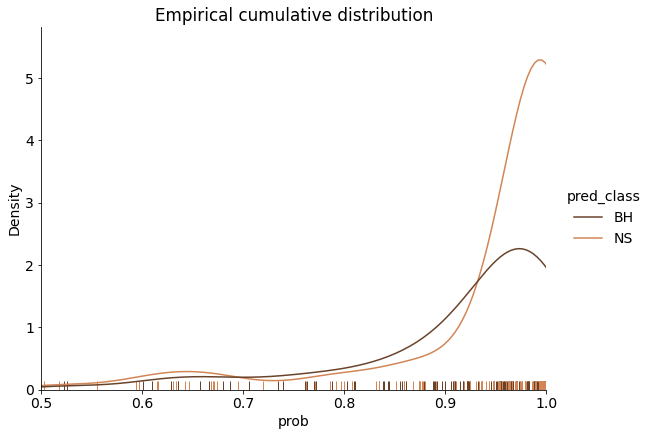

In [6]:
#plt.figure( figisze=(8,6))
s = sns.displot(
    data= data, x='prob' , 
    hue='pred_class' , kind='kde' , 
    cumulative = 0,
    rug=True, height=6 , aspect=8/6 , palette='copper')
#s.set_titles("Predicted prob distribution")
plt.xlim(0.5 , 1.0)
plt.title("Empirical cumulative distribution")
#plt.axvline(1.0 , 0,5 , color='black')
#plt.savefig('pred_result/ns_bh_post_prob_kde.jpg')
plt.show()


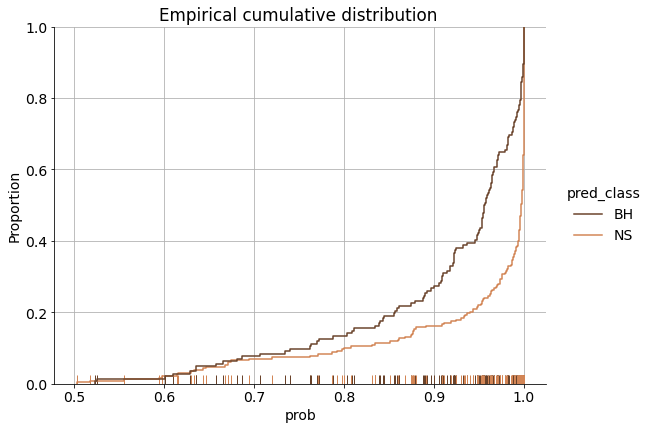

In [7]:
#plt.figure( figisze=(8,6))
s = sns.displot(
    data= data, x='prob' , 
    hue='pred_class' , kind='ecdf' , 
    rug=True, height=6 , aspect=8/6 , palette='copper')
#s.set_titles("Predicted prob distribution")
#plt.xlim(0.5 , 1.0)
plt.title("Empirical cumulative distribution ")
#plt.axvline(1.0 , 0,5 , color='black')
plt.grid()
plt.savefig('pred_result/ns_bh_post_prob_ecdf.jpg')
plt.show()


## Output Cross-correlation with features

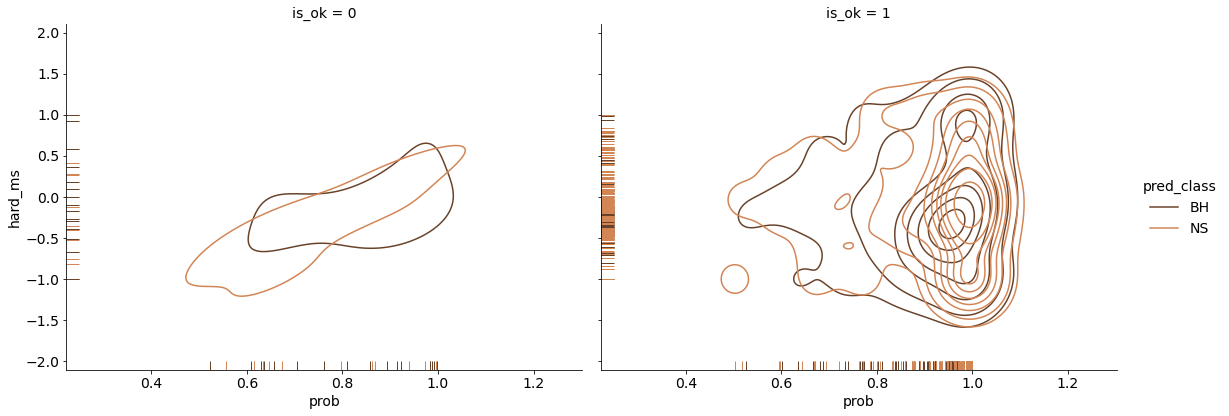

In [8]:
#plt.figure( figisze=(8,6))
s = sns.displot(
    data= data, x='prob' , y='hard_ms' ,
    hue='pred_class' , 
    kind='kde' , 
    cumulative = 0,
    rug=True, height=6 , aspect=8/6 ,
    palette='copper',
    col='is_ok',
    )
#s.set_titles("Predicted prob distribution")
#plt.xlim(0.5 , 1.0)
#plt.title("Empirical cumulative distribution")
plt.show()
